[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1mGXCNLa1hkdcmcMnQz3tg8mqb_NkFOFe?usp=sharing)

## (Extra) Numpy tricks

Problem: implement 2x2 rolling window for given 2d array 

In [ ]:
import numpy as np

x = np.arange(100).reshape(10, 10)
x.shape, x.strides

((10, 10), (80, 8))

Solution:

In [ ]:
a2 = np.lib.stride_tricks.as_strided(x, shape=(9, 9, 2, 2), strides=(40, 4, 40, 4))

In [ ]:
print(a2[0, 0])
print(a2[1, 1])

[[ 0  1]
 [10 11]]
[[11 12]
 [21 22]]


Usage: average 2d matrix over 2x2 windows:  

In [ ]:
a2.mean(axis=(-2, -1))

array([[7.51619277e+09, 7.51619277e+09, 9.66367642e+09, 9.66367642e+09,
        1.18111601e+10, 1.18111601e+10, 1.39586437e+10, 1.39586437e+10,
        1.61061274e+10],
       [1.82536110e+10, 1.82536110e+10, 2.04010947e+10, 2.04010947e+10,
        2.25485783e+10, 2.25485783e+10, 2.46960620e+10, 2.46960620e+10,
        2.68435456e+10],
       [2.89910293e+10, 2.89910293e+10, 3.11385129e+10, 3.11385129e+10,
        3.32859966e+10, 3.32859966e+10, 3.54334802e+10, 3.54334802e+10,
        3.75809638e+10],
       [3.97284475e+10, 3.97284475e+10, 4.18759311e+10, 4.18759311e+10,
        4.40234148e+10, 4.40234148e+10, 4.61708984e+10, 4.61708984e+10,
        4.83183821e+10],
       [5.04658657e+10, 5.04658657e+10, 5.26133494e+10, 5.26133494e+10,
        5.47608330e+10, 5.47608330e+10, 5.69083167e+10, 5.69083167e+10,
        5.90558003e+10],
       [6.12032840e+10, 6.12032840e+10, 6.33507676e+10, 6.33507676e+10,
        6.54982513e+10, 6.54982513e+10, 6.76457349e+10, 6.76457349e+10,
        6.9

# Matplotlib

In [ ]:
import matplotlib.pyplot as plt

### Basic charts

![](https://qph.fs.quoracdn.net/main-qimg-e649ba1703fef26b52964b58c7f7f2b3)

### Chart selection roadmap

![](http://blog.atkcg.ru/wp-content/uploads/2015/07/1-%D0%B9-%D1%81%D0%BB%D0%B0%D0%B9%D0%B41.jpg)

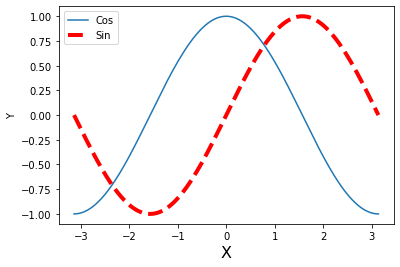

In [ ]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C, label='Cos')
plt.plot(X, S, label='Sin', c='r', linestyle='--', linewidth=4)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y')
plt.legend()
plt.show()

# Exercise on Numpy and Matplotlib

The data in [populations.txt](http://www.scipy-lectures.org/_downloads/populations.txt) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with ```np.loadtxt``` and do the following exercises **without for-loops**.


Plot the populations for the years in the period. Add legend and axis labels to the plot.

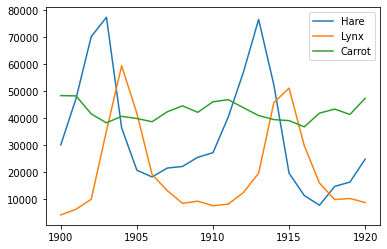

In [ ]:
data=np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')
years = data[:,0]
plt.plot(years,data[:,1], label='Hare')
plt.plot(years,data[:,2], label='Lynx')
plt.plot(years,data[:,3], label='Carrot')
plt.legend()
plt.xticks(years[::5])
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

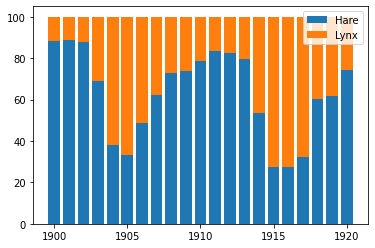

In [ ]:
years = data[:,0]
plt.bar(years,100*data[:,1]/(data[:,1]+data[:,2]), label='Hare')
plt.bar(years,100*data[:,2]/(data[:,1]+data[:,2]), label='Lynx' , bottom = 100*data[:,1]/(data[:,1]+data[:,2]))
plt.legend()
plt.xticks(years[::5])
plt.show()

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

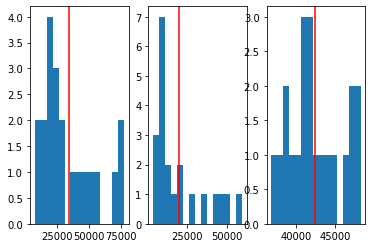

In [ ]:
fig, ax = plt.subplots(1, 3)

ax[0].hist(data[:,1], bins = 15)
ax[0].axvline(data[:,1].mean(), c = "r")

ax[1].hist(data[:,2], bins = 15)
ax[1].axvline(data[:,2].mean(), c = "r")

ax[2].hist(data[:,3], bins = 15)
ax[2].axvline(data[:,3].mean(), c = "r")
plt.show()

Find which year each species had the largest population. Mark these years in the plot of populations.

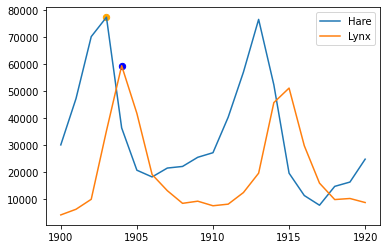

In [ ]:
years = data[:,0]
hare = data[:,1]
lynx = data[:,2]
mask1 = hare == max(hare)
mask2 = lynx == max(lynx)
plt.plot(years,hare, label='Hare')
plt.plot(years,lynx, label='Lynx')
plt.scatter(years[mask1],hare[mask1], color='orange', s=40, marker='o')
plt.scatter(years[mask2],lynx[mask2], color='blue', s=40, marker='o')
plt.legend()
plt.xticks(years[::5])
plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


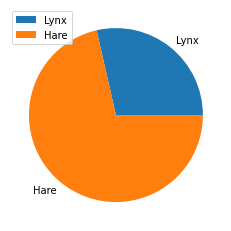

In [ ]:
years = data[:,0]
hare = data[:,1]
lynx = data[:,2]
mask = hare > lynx
result = np.full(years.size, "L")
result[mask] = 'H'
print(result)
L = np.count_nonzero(result == 'L')
H = np.count_nonzero(result == 'H')
vals = [L, H]
plt.pie(vals, labels=['Lynx', 'Hare'])
plt.legend()
plt.show()

Find which years any of the populations is above 50000. Show time periods where populations are above 50000
in the plot of populations.

[False False False False False False False False False False False False
 False False False False False False False False False]


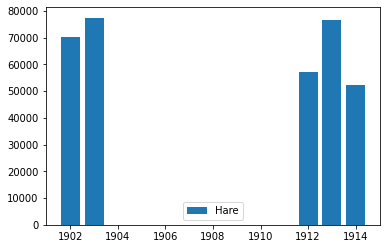

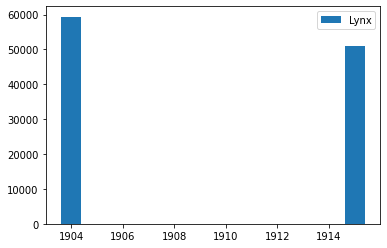

In [ ]:
years = data[:,0]
hare = data[:,1]
lynx = data[:,2]
mask1 = hare > 50000
mask2 = lynx > 50000
mask = mask2 * mask1
print(mask)
plt.bar(years[mask1],hare[mask1], label='Hare')
plt.legend()
plt.show()
plt.bar(years[mask2],lynx[mask2], label='Lynx')
plt.legend()
plt.show()

Find the top 2 years for each species when they had the lowest populations.

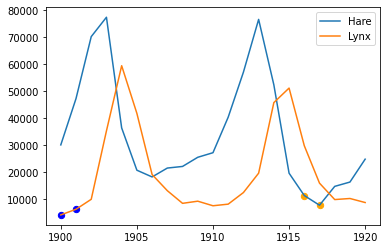

In [ ]:
years = data[:,0]
hare = data[:,1]
lynx = data[:,2]
minh = np.argpartition(hare, 2)
minl = np.argpartition(lynx, 2)
mask1 = hare <= hare[minh[1]] 
mask2 = lynx <= lynx[minl[1]] 
plt.plot(years,hare, label='Hare')
plt.plot(years,lynx, label='Lynx')
plt.scatter(years[mask1],hare[mask1], color='orange', s=40, marker='o')
plt.scatter(years[mask2],lynx[mask2], color='blue', s=40, marker='o')
plt.legend()
plt.xticks(years[::5])
plt.show()

Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

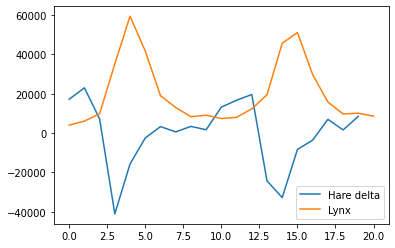

array([[ 1.        , -0.69334852],
       [-0.69334852,  1.        ]])

In [ ]:
plt.plot(np.diff(data[:,1]), label='Hare delta')
plt.plot(data[:,2], label="Lynx")
plt.legend()
plt.show()
np.corrcoef(np.diff(data[:,1]),data[:-1,2])

Show population of hares vs carrots and hares vs lynxes.

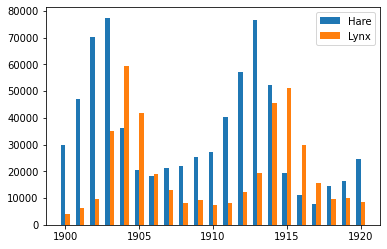

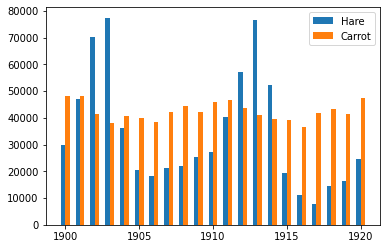

In [ ]:
years = data[:,0]
plt.bar(years-0.15,data[:,1], label='Hare',width = 0.3)
plt.bar(years+0.15,data[:,2], label='Lynx',width = 0.3)
plt.legend()
plt.xticks(years[::5])
plt.show()
plt.bar(years-0.15,data[:,1], label='Hare',width = 0.3)
plt.bar(years+0.15,data[:,3], label='Carrot',width = 0.3)
plt.legend()
plt.xticks(years[::5])
plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [ ]:
years = data[:,0]
hare = data[:,1]
lynx = data[:,2]
r=np.corrcoef(np.diff(hare[:-1]),data[:-2,2])
lm=np.mean(lynx)
hm=np.mean(np.diff(hare[:-1]))
lS=np.std(lynx)
hS=np.std(np.diff(hare[:-1]))
h=hm+r[1][0]*lS*hS/(lynx[20]-lm)
print(h+hare[19])
print(hare[20])

31881.244031097216
24700.0


## High-dimentional data visualization

What is an image?

![img](https://mymodernmet.com/wp/wp-content/uploads/2017/08/monovision-awards-bw-series-of-the-year-2017-02.jpg)

Basically, it is an array of numbers:

In [ ]:
from PIL import Image
import requests
from io import BytesIO

url = 'https://mymodernmet.com/wp/wp-content/uploads/2017/08/monovision-awards-bw-series-of-the-year-2017-02.jpg'

response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')
print(np.array(img).shape)
np.array(img)

(500, 750)


array([[145, 145, 144, ..., 142, 143, 144],
       [146, 146, 146, ..., 141, 143, 144],
       [146, 147, 146, ..., 140, 142, 143],
       ...,
       [114, 111, 120, ...,  78,  69,  56],
       [ 75,  83, 104, ...,  53,  51,  64],
       [ 63,  82, 108, ..., 101,  95,  94]], dtype=uint8)

What if we take a random point in a 500*750 dimentional space? Will it be a meaningful image?

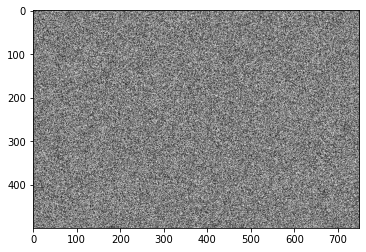

In [ ]:
sample_img = np.random.choice(np.arange(256), size=500*750).reshape(500, 750)
plt.imshow(sample_img, cmap='gray')
plt.show()

Meaningful images are very rare subset (manifold?) in a space of all possible images. Can we explore a structure of this subset?

Get the MNIST dataset:

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
images = digits.data.reshape(-1, 8, 8)

Look at some items in the dataset:

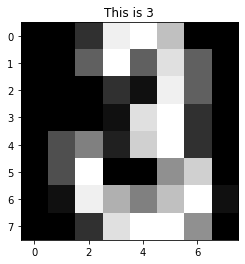

In [ ]:
i = 985
plt.imshow(images[i], cmap='gray')
plt.title('This is {}'.format(digits.target[i]))
plt.show()

Let's find a good projection plane for our data:

![img](https://i.stack.imgur.com/G7Gkv.png)

What is good actually?

![img](http://alexhwilliams.info/itsneuronalblog/img/pca/pca_two_views.png)

For detailed derivation of PCA look https://www.csd.uwo.ca/~oveksler/Courses/CS434a_541a/Lecture7.pdf

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

X_transformed = pca.fit_transform(digits.data.astype(float))
X_transformed.shape

(70000, 10)

Variances along eigenvectors:

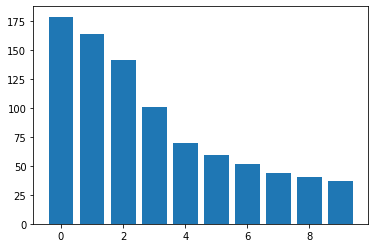

In [ ]:
plt.bar(np.arange(10), pca.explained_variance_)
plt.show()

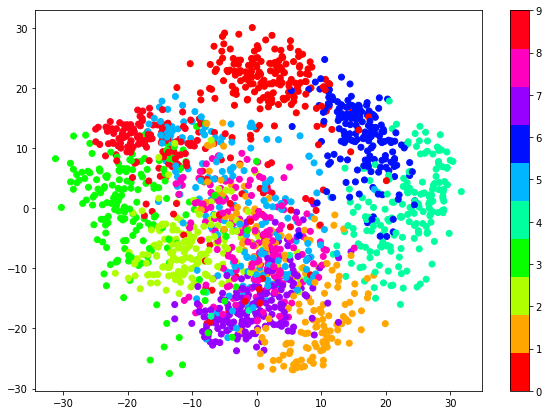

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=digits.target.astype(int), 
            cmap=plt.cm.get_cmap('hsv', 10))
plt.colorbar()
plt.show()

Make the projection manually. What we need are basis vectors and mean shift:

In [ ]:
pca.components_.shape, pca.mean_.shape

((10, 64), (64,))

Project on a subspace of principal components:

In [ ]:
proj = np.dot(digits.data.astype(float) - pca.mean_, pca.components_.T)
proj.shape

(1797, 10)

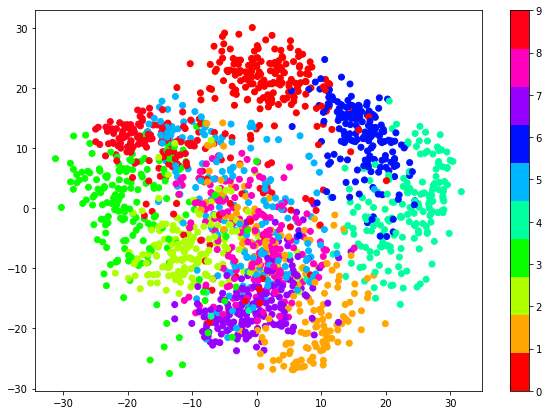

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target.astype(int), 
            cmap=plt.cm.get_cmap('hsv', 10))
plt.colorbar()
plt.show()

We can plot in 3D:

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*X_transformed.T[:3], c=digits.target, cmap='hsv')
plt.show()

<IPython.core.display.Javascript object>

To what extent we can restore original data from principal components?

In [ ]:
X_restored = pca.inverse_transform(X_transformed)
X_restored.shape

(1797, 64)

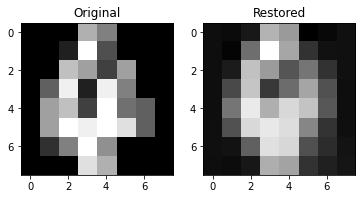

In [ ]:
%matplotlib inline
i = 540
fig, ax = plt.subplots(1, 2)
ax[0].imshow(digits.images[i], cmap='gray')
ax[1].imshow(X_restored[i].reshape(8, 8), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored')
plt.show()

Can you perform inverse transoformation explicitly?

In [ ]:
res = np.dot(X_transformed, ???) + ???

i = 540
fig, ax = plt.subplots(1, 2)
ax[0].imshow(digits.images[i], cmap='gray')
ax[1].imshow(res[i].reshape(8, 8), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored')
plt.show()

SyntaxError: ignored

Homework:

1. Complete all exersices with Lynx-Rabbits dataset.
2. Plot a graph of total explained variance vs number of principal components.
3. Find a number of principal components for 99%, 95%, 90%, and 85% of explained variance.
4. Plot an original image and restored images from 99%, 95%, 90%, and 85% of explained variance.
    
    Hint: download full-size 28x28 MNIST images to better see a difference between original and restored images

```python
from sklearn.datasets import fetch_openml
digits = fetch_openml('mnist_784')
```

![img](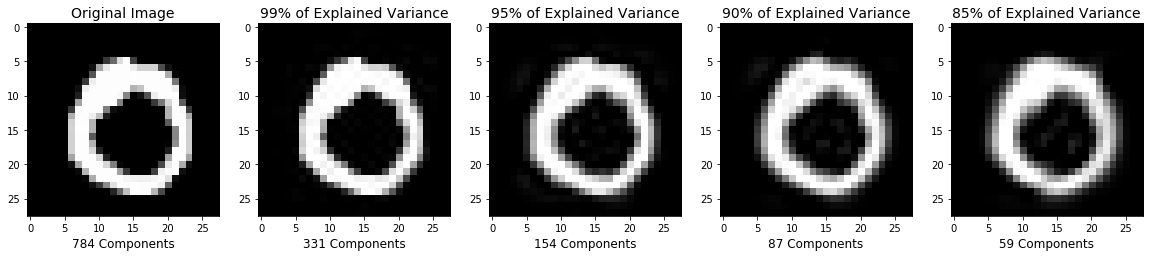%0A)

5*. Can you get a more insightful representation of MNIST dataset in 2D? For inspiration see https://colah.github.io/posts/2014-10-Visualizing-MNIST/

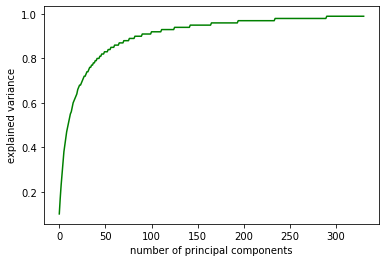

In [ ]:
#дз
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
digits = fetch_openml('mnist_784')
pca = PCA(n_components=0.99, svd_solver='full')
pca.fit_transform(digits.data.astype(float))
plt.plot(pca.explained_variance_ratio_.cumsum().round(2),c='g')
plt.xlabel('number of principal components')
plt.ylabel('explained variance')
plt.show()

In [ ]:
pca = PCA(n_components=0.99, svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
print('99% - ', X_transformed.shape[1])
pca = PCA(n_components=0.95, svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
print('95% - ', X_transformed.shape[1])
pca = PCA(n_components=0.90, svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
print('90% - ', X_transformed.shape[1])
pca = PCA(n_components=0.85, svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
print('85% - ', X_transformed.shape[1])

99% -  331
95% -  154
90% -  87
85% -  59


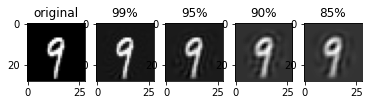

In [ ]:
images = digits.data.reshape(-1, 28, 28)
pca = PCA(n_components=0.99,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)

k = 540
fig, ax = plt.subplots(1, 5)
ax[0].imshow(images[k], cmap='gray')
ax[1].imshow(X_restored[k].reshape(28, 28), cmap='gray')
ax[0].set_title('original')
ax[1].set_title('99%')

pca = PCA(n_components=0.95,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)
ax[2].imshow(X_restored[k].reshape(28, 28), cmap='gray')
ax[2].set_title('95%')

pca = PCA(n_components=0.9,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)
ax[3].imshow(X_restored[k].reshape(28, 28), cmap='gray')
ax[3].set_title('90%')

pca = PCA(n_components=0.85,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)
ax[4].imshow(X_restored[k].reshape(28, 28), cmap='gray')
ax[4].set_title('85%')
plt.show()